- oscprep minimum, Design matrix fit f1 & f2
- oscprep minimum + trend predictor, Design matrix fit f1 & f2
- 6 mc param, Design matrix fit f1 & f2
- 24, design matrix fit f1 & f2
- WM/CSF design matrix
- top 5 WM/CSF
- 50% WM/CSF 
- fmriprep recommends variance 
- Nuisance regressor with physiological monitoring [?]
- scrubbing 
- [Intermodulatory frequency: f_2 +/- f_1]
- Surface-project data for frequency-fitted maps
# Next steps:
2) GLM Denoise
3) HRAN


In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys

sys.path.append('/opt/app')

from fastfmri_toolbox.modelling.design_matrix import DesignMatrix

from pathlib import Path

In [2]:
oscprep_dir = "/data/fastfmri_toolbox_test_data/oscprep_grayords_fmapless"
sub_dir = 'bold_preproc'

# bold labels
sub_id = '002'
ses_id = '01'
task_id = 'entrainQ1'
run_id = '01'

# task parameters
search_frequencies = [.125, .2]
time_window = (40, 14+205)


bold_path = Path(
    f"/data/fastfmri_toolbox_test_data/oscprep_grayords_fmapless/bold_preproc/sub-{sub_id}/" \
    f"ses-{ses_id}/func/sub-{sub_id}_ses-{ses_id}_task-{task_id}_acq-mb4_dir-RL_run-{run_id}" \
    "_space-T1w_desc-preproc_bold.nii.gz"
)
assert bold_path.exists(), f"{bold_path} does not exist."

!ls {oscprep_dir}/{sub_dir}/sub-{sub_id}/ses-{ses_id}/func/sub-{sub_id}_ses-{ses_id}_task-{task_id}*run-{run_id}*

/data/fastfmri_toolbox_test_data/oscprep_grayords_fmapless/bold_preproc/sub-002/ses-01/func/sub-002_ses-01_task-entrainQ1_acq-mb4_dir-RL_run-01_desc-confounds_timeseries.json
/data/fastfmri_toolbox_test_data/oscprep_grayords_fmapless/bold_preproc/sub-002/ses-01/func/sub-002_ses-01_task-entrainQ1_acq-mb4_dir-RL_run-01_desc-confounds_timeseries.tsv
/data/fastfmri_toolbox_test_data/oscprep_grayords_fmapless/bold_preproc/sub-002/ses-01/func/sub-002_ses-01_task-entrainQ1_acq-mb4_dir-RL_run-01_desc-preproc_bold.dtseries.nii
/data/fastfmri_toolbox_test_data/oscprep_grayords_fmapless/bold_preproc/sub-002/ses-01/func/sub-002_ses-01_task-entrainQ1_acq-mb4_dir-RL_run-01_desc-preproc_bold.json
/data/fastfmri_toolbox_test_data/oscprep_grayords_fmapless/bold_preproc/sub-002/ses-01/func/sub-002_ses-01_task-entrainQ1_acq-mb4_dir-RL_run-01_space-T1w_boldref.nii.gz
/data/fastfmri_toolbox_test_data/oscprep_grayords_fmapless/bold_preproc/sub-002/ses-01/func/sub-002_ses-01_task-entrainQ1_acq-mb4_dir-RL_run

In [3]:
dm = DesignMatrix(time_window, search_frequencies, bold_path=bold_path)

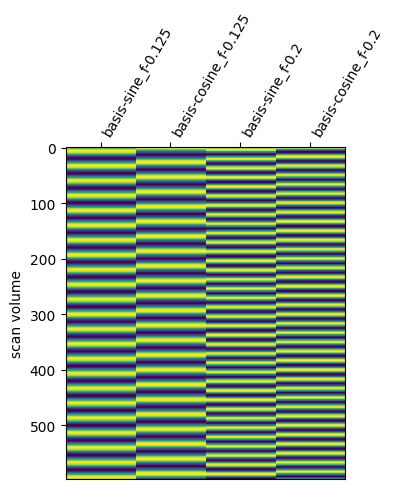

In [4]:
from fastfmri_toolbox.modelling.design_matrix import FrequencyRegressors
dm.add_regressor(FrequencyRegressors(search_frequencies, dm.time_points))
dm.plot_design_matrix(figsize=(dm.build_design_matrix().shape[-1],5))

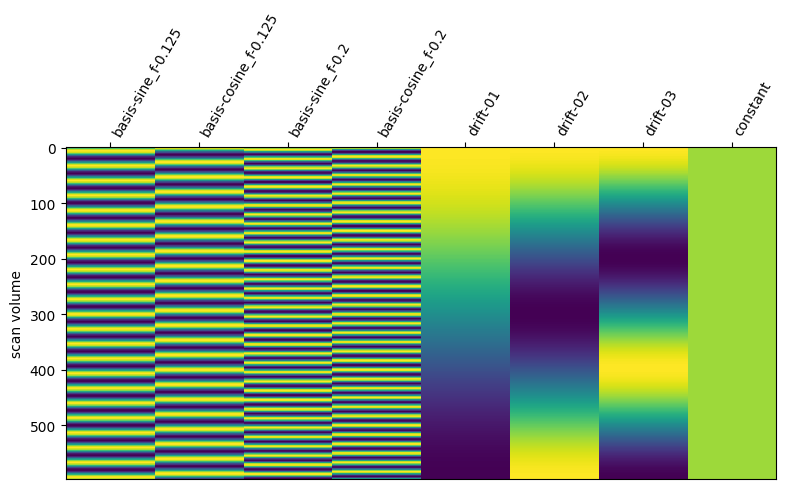

In [5]:
from fastfmri_toolbox.modelling.design_matrix import DriftRegressors
dm.add_regressor(DriftRegressors(dm.time_points, high_pass_threshold=.01, add_constant = True))
dm.plot_design_matrix(figsize=(dm.build_design_matrix().shape[-1],5))

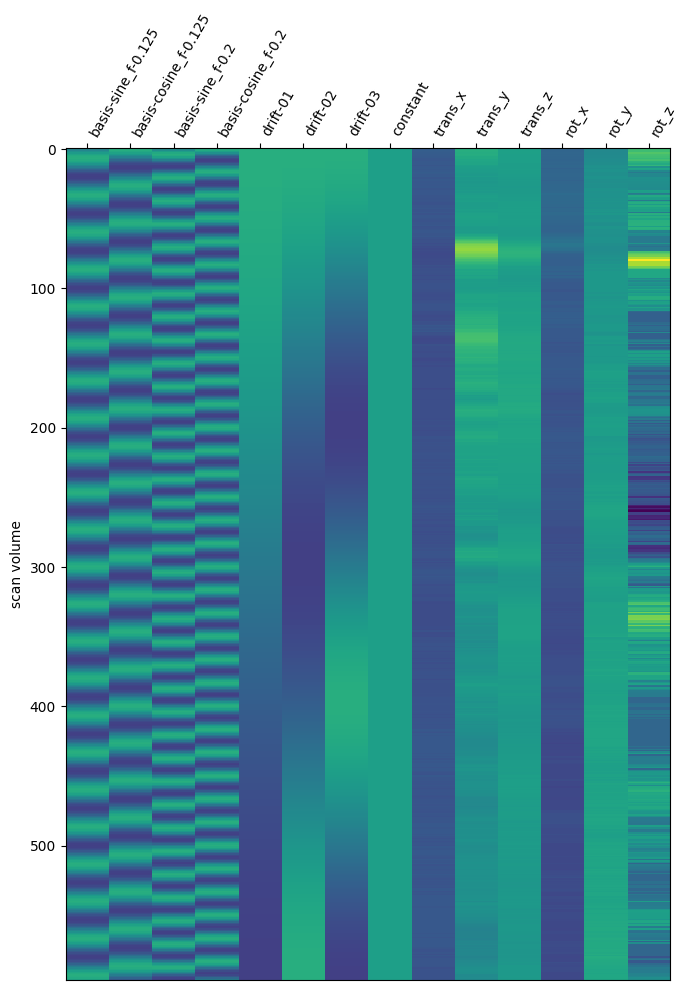

In [6]:
from fastfmri_toolbox.modelling.design_matrix import MotionParameters
dm.add_regressor(MotionParameters(dm.get_time_indices(time_window), mc_params = 6))
dm.plot_design_matrix(figsize=(dm.build_design_matrix().shape[-1]/2,10))

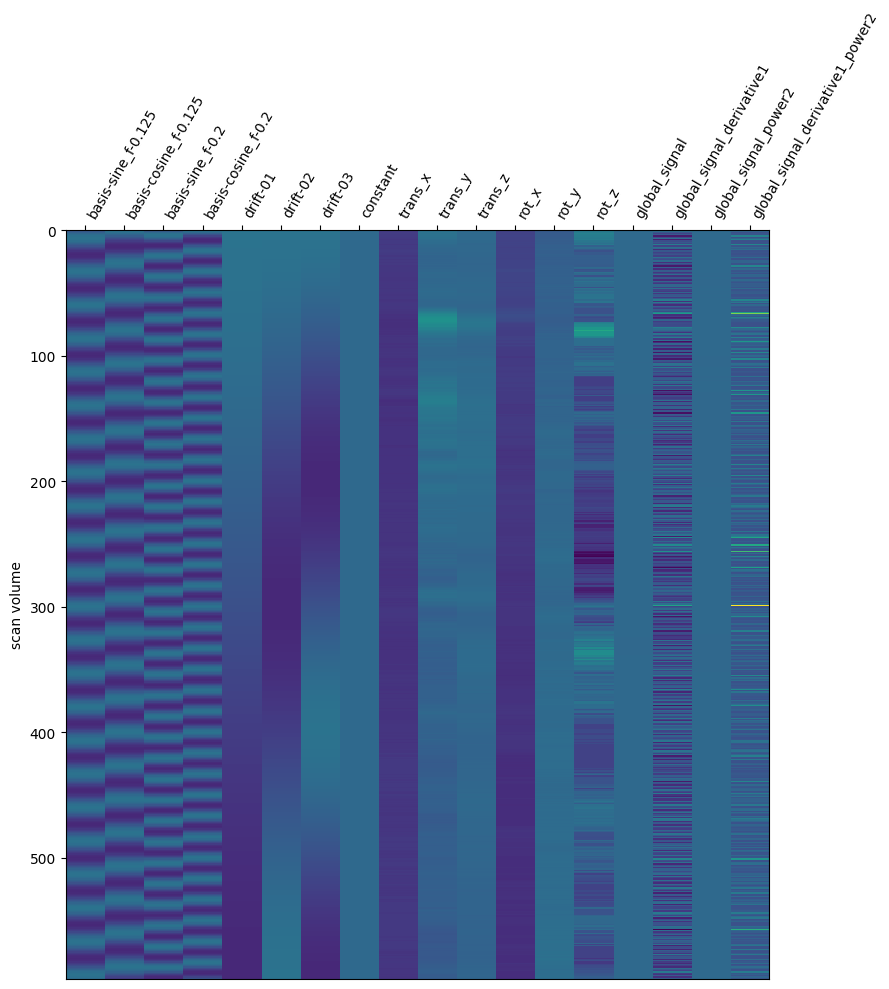

In [7]:
from fastfmri_toolbox.modelling.design_matrix import MeanSignalRegressors
dm.add_regressor(MeanSignalRegressors(dm.get_time_indices(time_window), regressor_type='Global', higher_order_flag = True))
dm.plot_design_matrix(figsize=(dm.build_design_matrix().shape[-1]/2,10))

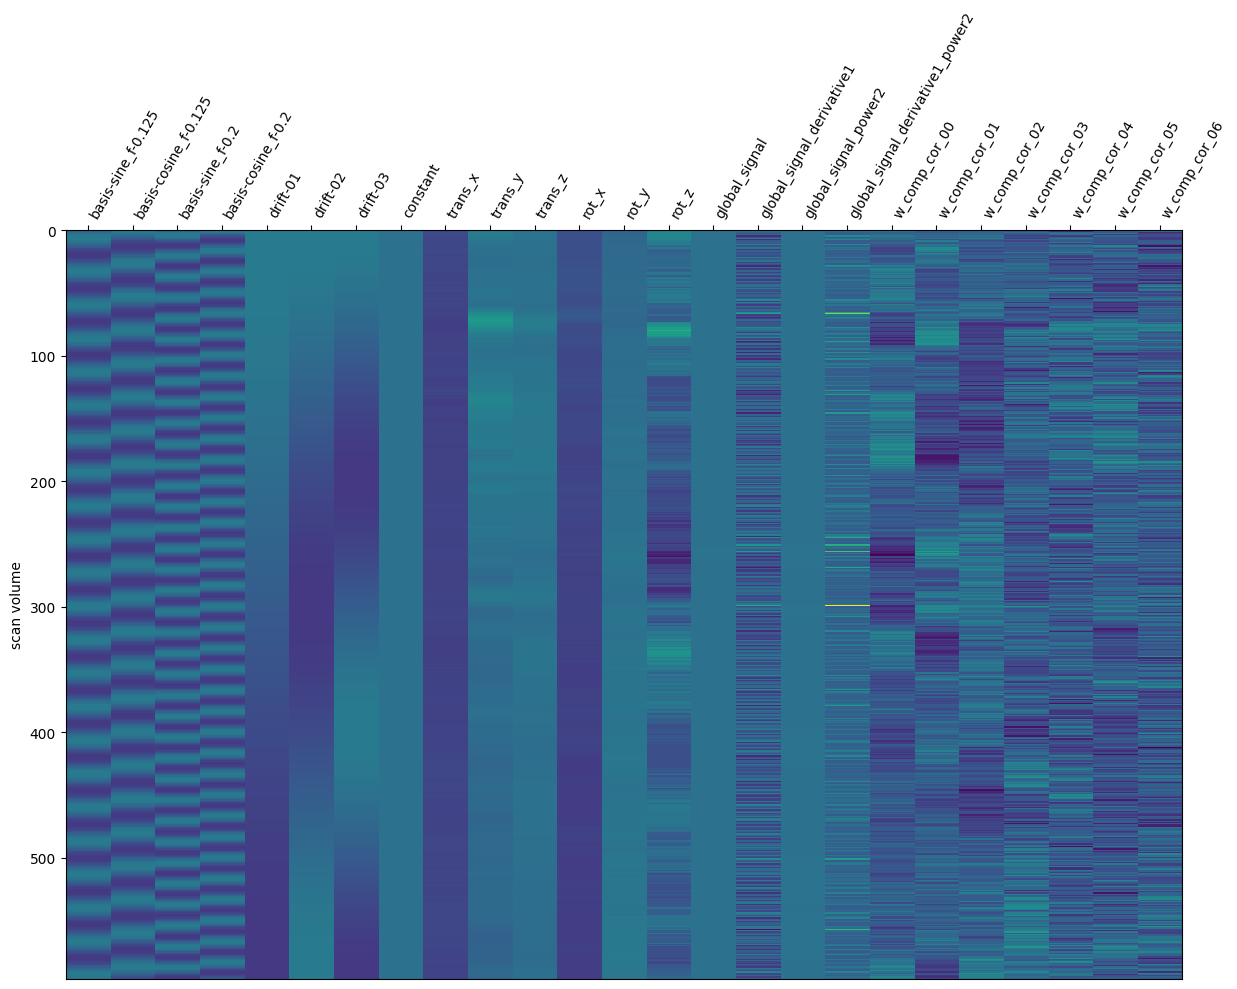

In [8]:
from fastfmri_toolbox.modelling.design_matrix import CompCorRegressors
dm.add_regressor(CompCorRegressors(dm.get_time_indices(time_window), regressor_type='WM', variance_explained=.1))
dm.plot_design_matrix(figsize=(dm.build_design_matrix().shape[-1]/2,10))

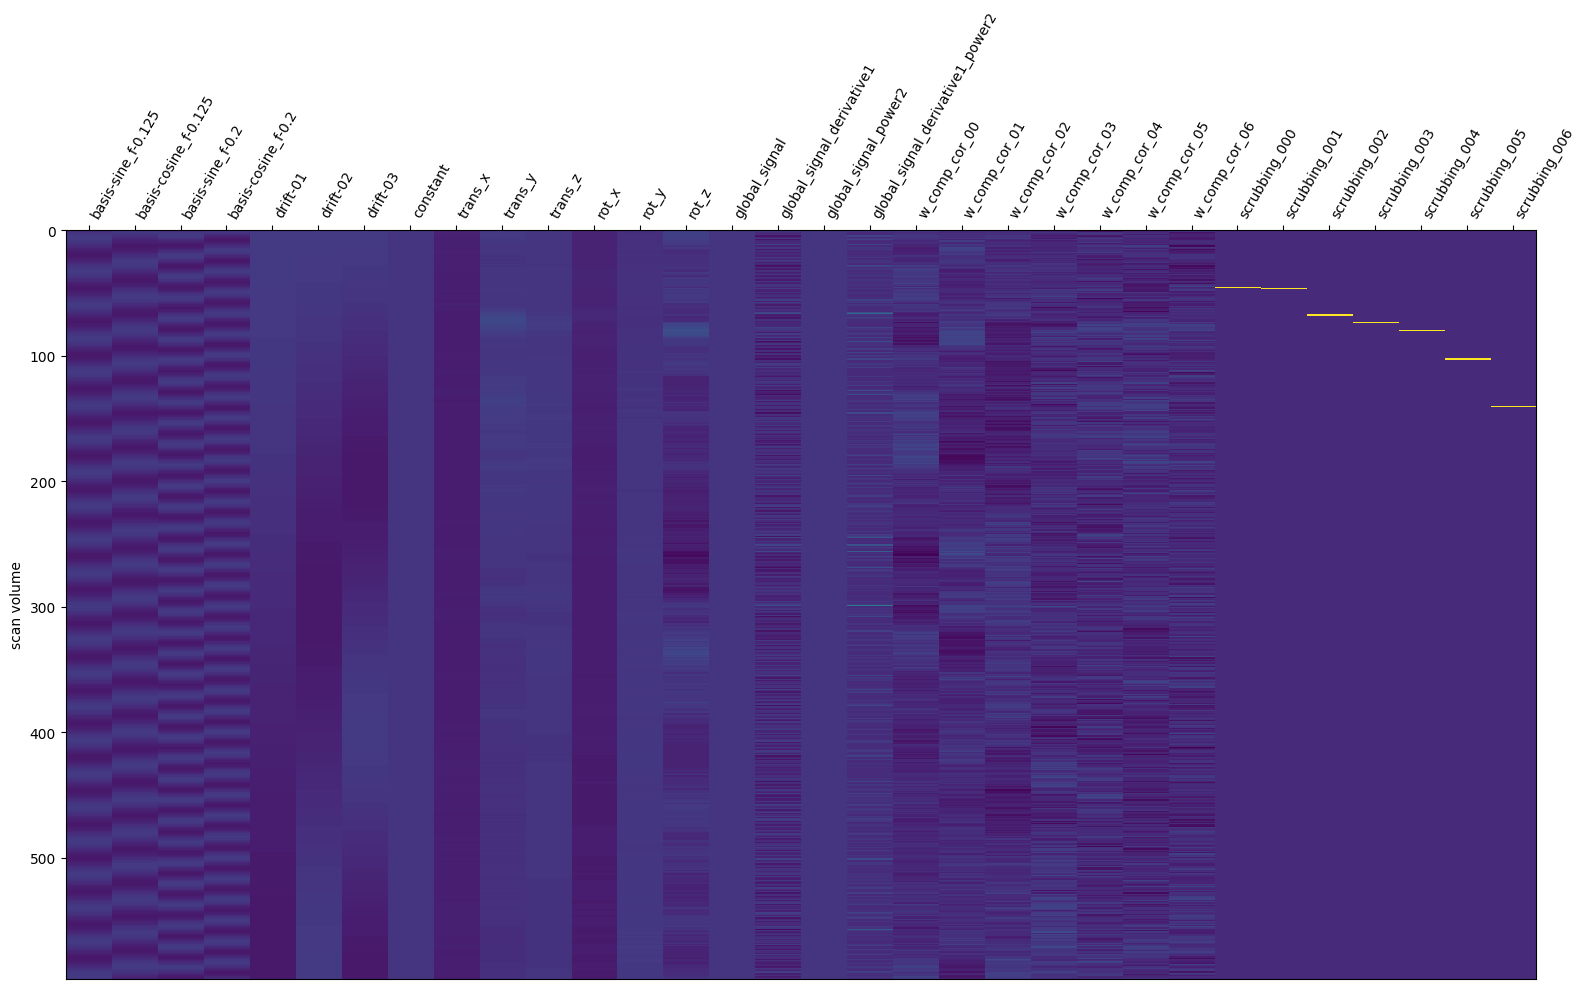

In [9]:
from fastfmri_toolbox.modelling.design_matrix import ScrubbingRegressors
dm.add_regressor(ScrubbingRegressors(dm.get_time_indices(time_window), movement_param='FD', movement_threshold=.05))
dm.plot_design_matrix(figsize=(dm.build_design_matrix().shape[-1]/2,10))

In [10]:
dm.build_design_matrix()

,basis-sine_f-0.125,basis-cosine_f-0.125,basis-sine_f-0.2,basis-cosine_f-0.2,drift-01,drift-02,drift-03,constant,trans_x,trans_y,...,w_comp_cor_04,w_comp_cor_05,w_comp_cor_06,scrubbing_000,scrubbing_001,scrubbing_002,scrubbing_003,scrubbing_004,scrubbing_005,scrubbing_006
0.000000,0.000000,1.000000,0.000000,1.000000,0.057880,0.057879,0.057878,1.0,-0.071326,0.105472,...,-0.035593,-0.001988,0.073644,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.300000,0.233445,0.972370,0.368125,0.929776,0.057878,0.057873,0.057864,1.0,-0.071061,0.105156,...,-0.067102,-0.005009,0.034196,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.600000,0.453991,0.891007,0.684547,0.728969,0.057875,0.057860,0.057835,1.0,-0.072723,0.104934,...,0.017127,-0.009949,-0.070468,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.900000,0.649448,0.760406,0.904827,0.425779,0.057870,0.057841,0.057792,1.0,-0.074810,0.102328,...,0.037823,0.027625,-0.041983,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.200000,0.809017,0.587785,0.998027,0.062790,0.057864,0.057815,0.057734,1.0,-0.076837,0.103652,...,0.026219,-0.045985,-0.025324,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177.600007,0.951058,0.309012,-0.125342,-0.992114,-0.057864,0.057815,-0.057734,1.0,-0.098675,0.042774,...,0.040209,0.014290,0.058449,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177.900007,0.996918,0.078454,-0.481761,-0.876302,-0.057870,0.057841,-0.057792,1.0,-0.100278,0.034037,...,0.044592,-0.063113,0.027808,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178.200007,0.987687,-0.156440,-0.770519,-0.637417,-0.057875,0.057860,-0.057835,1.0,-0.099267,0.033393,...,0.042355,-0.015915,-0.032685,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178.500007,0.923877,-0.382689,-0.951059,-0.309009,-0.057878,0.057873,-0.057864,1.0,-0.100606,0.035121,...,-0.009168,-0.008075,0.007782,0.0,0.0,0.0,0.0,0.0,0.0,0.0
